# Python For Traders and Investors - Chapter 4

## 4.1 Handling date and time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Datetime handling is really important for quantitative trading applications. We often deal with different time zones, daylight saving, leap days and so on. This can really be a problem for our research. Let's see how we can deal with this effectively.

In [2]:
from datetime import datetime, timedelta

In [3]:
datetime.now()

datetime.datetime(2021, 7, 16, 18, 31, 50, 322615)

In [4]:
datetime.now() + timedelta(61)

datetime.datetime(2021, 9, 15, 18, 32, 14, 256559)

We get the time and date exactly 61 days from now. What about 61 days, 3 hours and 12 minutes?

In [5]:
new_time = datetime.now() + timedelta(61,3600*3+60*12)
new_time

datetime.datetime(2021, 9, 15, 21, 47, 49, 596440)

In [6]:
# Converting to string
str(new_time)

'2021-09-15 21:47:49.596440'

Here, we also turned the *datetime object* into a string for better readability. In backtests we often start with a date string and then have to some datetime arithmetic. Previously we read a .csv file line-by-line:

In [7]:
dates = []
fid = open('output.csv')
fid.readline() 
for i in fid:
    line = i.strip().split(',')
    dates.append(line[0])

In [8]:
dates[:3]

['1980-12-12', '1980-12-15', '1980-12-16']

Converting date strings to datetime objects:

In [9]:
from dateutil.parser import parse

In [10]:
# This gives us the datetime object of the first date in our price data file
parse(dates[0])

datetime.datetime(1980, 12, 12, 0, 0)

In [13]:
# But if we parse the whole 'dates' list:
#parse(dates)
# The above code will cause error. See next few lines for another method.

Another method is to use the to_datetime() function from pandas:

In [11]:
pd.to_datetime(dates[0])

Timestamp('1980-12-12 00:00:00')

In [12]:
pd.to_datetime(dates)

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2021-07-01', '2021-07-02', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-12', '2021-07-13',
               '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', length=10234, freq=None)

## 4.2 Converting timezones

Let's calculate the time period that is covered by our data file:

In [13]:
dates

['1980-12-12',
 '1980-12-15',
 '1980-12-16',
 '1980-12-17',
 '1980-12-18',
 '1980-12-19',
 '1980-12-22',
 '1980-12-23',
 '1980-12-24',
 '1980-12-26',
 '1980-12-29',
 '1980-12-30',
 '1980-12-31',
 '1981-01-02',
 '1981-01-05',
 '1981-01-06',
 '1981-01-07',
 '1981-01-08',
 '1981-01-09',
 '1981-01-12',
 '1981-01-13',
 '1981-01-14',
 '1981-01-15',
 '1981-01-16',
 '1981-01-19',
 '1981-01-20',
 '1981-01-21',
 '1981-01-22',
 '1981-01-23',
 '1981-01-26',
 '1981-01-27',
 '1981-01-28',
 '1981-01-29',
 '1981-01-30',
 '1981-02-02',
 '1981-02-03',
 '1981-02-04',
 '1981-02-05',
 '1981-02-06',
 '1981-02-09',
 '1981-02-10',
 '1981-02-11',
 '1981-02-12',
 '1981-02-13',
 '1981-02-17',
 '1981-02-18',
 '1981-02-19',
 '1981-02-20',
 '1981-02-23',
 '1981-02-24',
 '1981-02-25',
 '1981-02-26',
 '1981-02-27',
 '1981-03-02',
 '1981-03-03',
 '1981-03-04',
 '1981-03-05',
 '1981-03-06',
 '1981-03-09',
 '1981-03-10',
 '1981-03-11',
 '1981-03-12',
 '1981-03-13',
 '1981-03-16',
 '1981-03-17',
 '1981-03-18',
 '1981-03-

In [14]:
dates[0]

'1980-12-12'

In [15]:
dates[-1]

'2021-07-15'

In [16]:
(parse(dates[-1]) - parse(dates[0]))

datetime.timedelta(days=14825)

Timedelta objects specify days and seconds. The time period in our file is 14825 days. We can also output that number as an integer for further use:

In [17]:
# The exact number of days
(parse(dates[-1]) - parse(dates[0])).days

14825

In [21]:
# Let's go a bit crazy:
(parse(dates[-1]) - parse(dates[0])).total_seconds()

96940800.0

There are other ways to generate a datetime object. Sometimes we need them as our parser is quite slow because it has to figure out what format our date string is in. Alternatively, we can split up our date string into integer numbers and feed them into datetime:

In [18]:
# Much faster but more complicated than the dateutil parser.
ns = dates[0].split('-')
datetime(int(ns[0]),int(ns[1]),int(ns[2]))

datetime.datetime(1980, 12, 12, 0, 0)

If we deal with multiple international exchanges it is always a good idea to convert all the times into universal time (UTC), which is the Greenwich mean time (London) without the daylight saving.

In [19]:
ns

['1980', '12', '12']

In [20]:
import pytz

In [21]:
datetime(int(ns[0]), int(ns[1]), int(ns[2]), tzinfo=pytz.utc)

datetime.datetime(1980, 12, 12, 0, 0, tzinfo=<UTC>)

In [22]:
datetime.now(pytz.timezone('UTC'))

datetime.datetime(2021, 7, 16, 9, 50, 1, 857646, tzinfo=<UTC>)

In [23]:
datetime.now()

datetime.datetime(2021, 7, 16, 18, 50, 12, 398793)

To be honest, the standard timezone handling in Python is pretty average. There is a package called delorean (remember the movie "Back to the Future") that makes it much simpler.

http://delorean.readthedocs.io/en/latest/quickstart.html

In [26]:
#!pip install Delorean

In [27]:
from delorean import Delorean

In [28]:
d1 = Delorean(datetime(2019, 12, 1), timezone='Australia/Sydney')
d1

Delorean(datetime=datetime.datetime(2019, 12, 1, 0, 0), timezone='Australia/Sydney')

We now look at what time it is currently in the US/Eastern timezone

In [29]:
# Convert the datetime to US/Eastern timezone
d1 = d1.shift("US/Eastern")

# Convert to string 
str(d1.datetime)

'2019-11-30 08:00:00-05:00'

If we subtract the different times from the two timezones we should get zero time difference:

In [30]:
# Time arithmetic: difference between different time zones
d1.datetime - d1.shift("US/Eastern").datetime

datetime.timedelta(0)

For very fast applications it is recommended to use the so-called __Unix timestamp__. Linux time is the number of seconds since the first of Jan 1970 in UTC. This is just a float number and much faster to process than a time stamp, but less descriptive. We simply get Linux time like this:

In [31]:
str(d1.datetime)

'2019-11-30 08:00:00-05:00'

In [32]:
d1.epoch

1575118800.0

In [33]:
timestmp = d1.epoch

In [34]:
timestmp = d1.epoch
timestmp

1575118800.0

In [35]:
datetime.fromtimestamp(timestmp)

datetime.datetime(2019, 11, 30, 22, 0)

In [36]:
now = datetime.now()
now

datetime.datetime(2021, 7, 16, 18, 53, 52, 165628)

In [37]:
timestamp_now = datetime.timestamp(now)
timestamp_now

1626429232.165628

The choice of formats always depends on the individual application.

## 4.3 Calculating returns

In [38]:
import pandas as pd
import numpy as np

In [39]:
data = pd.read_csv('output.csv', index_col=0, parse_dates=True)
data.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-12-12,0.13,0.13,0.13,0.13,469030000.0,-0.9988
1980-12-15,0.12,0.12,0.12,0.12,175880000.0,-0.0769
1980-12-16,0.11,0.11,0.11,0.11,105730000.0,-0.0833
1980-12-17,0.12,0.12,0.12,0.12,86440000.0,0.0909
1980-12-18,0.12,0.12,0.12,0.12,73450000.0,0.0000


In [40]:
data['%_return'] = data['Close'].pct_change()

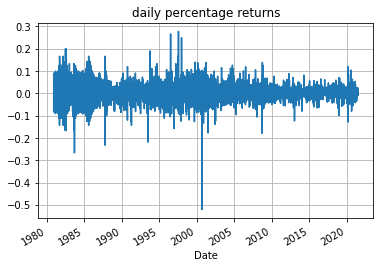

In [41]:
data['%_return'].plot()
plt.title('daily percentage returns')
plt.grid()
plt.show()

In [42]:
data['%_return'].head()

Date
1980-12-12         NaN
1980-12-15   -0.076923
1980-12-16   -0.083333
1980-12-17    0.090909
1980-12-18    0.000000
Name: %_return, dtype: float64

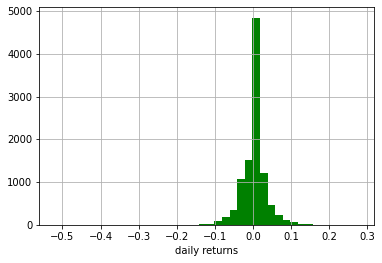

In [43]:
plt.hist(data['%_return'].dropna(), bins=40, color='g')
plt.grid()
plt.xlabel('daily returns')
plt.show()

In [44]:
data['Close'].resample('M').last().head()

Date
1980-12-31    0.15
1981-01-31    0.13
1981-02-28    0.12
1981-03-31    0.11
1981-04-30    0.13
Freq: M, Name: Close, dtype: float64

#### Monthly returns

In [45]:
data['Close'].resample('M').ffill().head()

Date
1980-12-31    0.15
1981-01-31    0.13
1981-02-28    0.12
1981-03-31    0.11
1981-04-30    0.13
Freq: M, Name: Close, dtype: float64

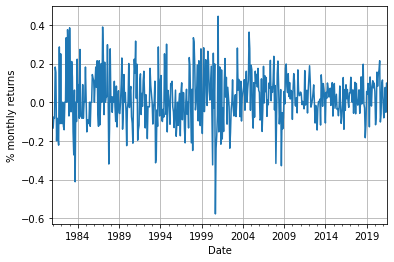

In [46]:
data['Close'].resample('M').ffill().pct_change().plot()
plt.ylabel('% monthly returns')
plt.grid()
plt.show()

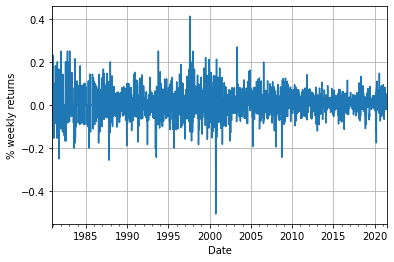

In [47]:
# Weekly returns
data['Close'].resample('W').ffill().pct_change().plot()
plt.ylabel('% weekly returns')
plt.grid()
plt.show()

#### Cumulative returns

cumprod(): Return cumulative product over a DataFrame or Series axis

In [48]:
data['cum_return'] = (data['%_return'] + 1).cumprod()

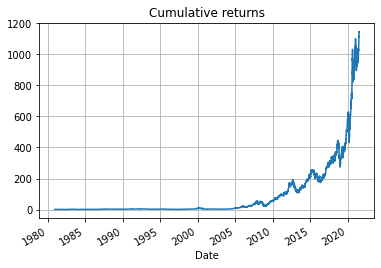

In [49]:
data['cum_return'].plot()
plt.title('Cumulative returns')
plt.grid()
plt.show()

## 4.4 Calculating volatility

In [50]:
data.drop(['cum_return'], axis=1, inplace=True)

In [51]:
data.head()

,Close,Open,High,Low,Volume,Change,%_return
Date,,,,,,,
1980-12-12,0.13,0.13,0.13,0.13,469030000.0,-0.9988,NaN
1980-12-15,0.12,0.12,0.12,0.12,175880000.0,-0.0769,-0.076923
1980-12-16,0.11,0.11,0.11,0.11,105730000.0,-0.0833,-0.083333
1980-12-17,0.12,0.12,0.12,0.12,86440000.0,0.0909,0.090909
1980-12-18,0.12,0.12,0.12,0.12,73450000.0,0.0000,0.000000


In [52]:
# Apply a rolling window of 10
data['volatility'] = data['%_return'].rolling(10).std()

In [53]:
data.tail()

,Close,Open,High,Low,Volume,Change,%_return,volatility
Date,,,,,,,,
2021-07-09,145.11,142.75,145.65,142.65,99890000.0,0.0131,0.013055,0.009310
2021-07-12,144.50,146.22,146.22,144.04,76300000.0,-0.0042,-0.004204,0.009577
2021-07-13,145.64,143.70,147.46,143.70,100830000.0,0.0079,0.007889,0.009459
2021-07-14,149.15,148.00,149.57,147.70,127050000.0,0.0241,0.024101,0.010755
2021-07-15,148.48,149.25,149.98,147.10,106820000.0,-0.0045,-0.004492,0.011532


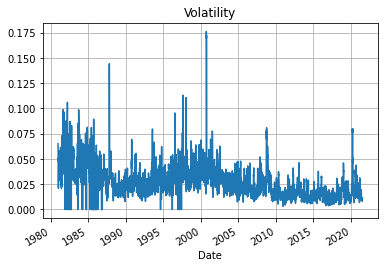

In [54]:
data['volatility'].plot()
plt.title('Volatility')
plt.grid()
plt.show()

In [60]:
import yfinance as yf

In [65]:
# Download data for AMZN, GOOG, COST and S&P500
mydata = yf.download(['AMZN', 'COST', 'GOOG', '^GSPC'],start = '2019-01-01')

[*********************100%***********************]  4 of 4 completed


In [66]:
mydata

Adj Close                                              Close  \
                   AMZN        COST         GOOG        ^GSPC         AMZN   
Date                                                                         
2018-12-31  1501.969971  194.124084  1035.609985  2506.850098  1501.969971   
2019-01-02  1539.130005  195.124680  1045.849976  2510.030029  1539.130005   
2019-01-03  1500.280029  190.988907  1016.059998  2447.889893  1500.280029   
2019-01-04  1575.390015  196.535034  1070.709961  2531.939941  1575.390015   
2019-01-07  1629.510010  197.259293  1068.390015  2549.689941  1629.510010   
...                 ...         ...          ...          ...          ...   
2021-07-09  3719.340088  412.369995  2591.489990  4369.549805  3719.340088   
2021-07-12  3718.550049  407.880005  2611.280029  4384.629883  3718.550049   
2021-07-13  3677.360107  407.059998  2619.889893  4369.209961  3677.360107   
2021-07-14  3681.679932  409.950012  2641.649902  4374.299805  3681.679932   
2021-07-15  3631.199951  411.820007  2625.330078  4360.029785  3631.199951   

                                                         High              \
                  COST         GOOG        ^GSPC         AMZN        COST   
Date                                                                        
2018-12-31  203.710007  1035.609985  2506.850098  1520.760010  204.389999   
2019-01-02  204.759995  1045.849976  2510.030029  1553.359985  205.100006   
2019-01-03  200.419998  1016.059998  2447.889893  1538.000000  205.940002   
2019-01-04  206.240005  1070.709961  2531.939941  1594.000000  207.929993   
2019-01-07  207.000000  1068.390015  2549.689941  1634.560059  209.119995   
...                ...          ...          ...          ...         ...   
2021-07-09  412.369995  2591.489990  4369.549805  3748.000000  414.000000   
2021-07-12  407.880005  2611.280029  4384.629883  3757.290039  414.350006   
2021-07-13  407.059998  2619.889893  4369.209961  3773.080078  409.290009   
2021-07-14  409.950012  2641.649902  4374.299805  3717.659912  410.470001   
2021-07-15  411.820007  2625.330078  4360.029785  3695.399902  412.200012   

            ...          Low                      Open              \
            ...         GOOG        ^GSPC         AMZN        COST   
Date        ...                                                      
2018-12-31  ...  1023.590027  2482.820068  1510.800049  203.380005   
2019-01-02  ...  1015.710022  2467.469971  1465.199951  200.500000   
2019-01-03  ...  1014.070007  2443.959961  1520.010010  203.699997   
2019-01-04  ...  1027.417969  2474.330078  1530.000000  203.080002   
2019-01-07  ...  1054.760010  2524.560059  1602.310059  205.520004   
...         ...          ...          ...          ...         ...   
2021-07-09  ...  2578.870117  4329.379883  3722.520020  408.549988   
2021-07-12  ...  2592.000000  4364.029785  3744.000000  414.040009   
2021-07-13  ...  2612.739990  4366.919922  3702.100098  404.700012   
2021-07-14  ...  2637.959961  4362.359863  3708.850098  408.579987   
2021-07-15  ...  2611.959961  4340.700195  3694.199951  410.459991   

                                       Volume                                
                   GOOG        ^GSPC     AMZN     COST     GOOG       ^GSPC  
Date                                                                         
2018-12-31  1050.959961  2498.939941  6954500  1729400  1493300  3442870000  
2019-01-02  1016.570007  2476.959961  7983100  2143100  1532600  3733160000  
2019-01-03  1041.000000  2491.919922  6975600  2877700  1841100  3822860000  
2019-01-04  1032.589966  2474.330078  9182600  2761600  2093900  4213410000  
2019-01-07  1071.500000  2535.610107  7993200  2226600  1981900  4104710000  
...                 ...          ...      ...      ...      ...         ...  
2021-07-09  2578.889893  4329.379883  3745100  2302900   755300  2738280000  
2021-07-12  2596.669922  4372.410156  2571600  2491300   847200  2983980000  
202

In [67]:
mydata.columns

MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'COST'),
            ('Adj Close',  'GOOG'),
            ('Adj Close', '^GSPC'),
            (    'Close',  'AMZN'),
            (    'Close',  'COST'),
            (    'Close',  'GOOG'),
            (    'Close', '^GSPC'),
            (     'High',  'AMZN'),
            (     'High',  'COST'),
            (     'High',  'GOOG'),
            (     'High', '^GSPC'),
            (      'Low',  'AMZN'),
            (      'Low',  'COST'),
            (      'Low',  'GOOG'),
            (      'Low', '^GSPC'),
            (     'Open',  'AMZN'),
            (     'Open',  'COST'),
            (     'Open',  'GOOG'),
            (     'Open', '^GSPC'),
            (   'Volume',  'AMZN'),
            (   'Volume',  'COST'),
            (   'Volume',  'GOOG'),
            (   'Volume', '^GSPC')],
           )

In [68]:
df_close = mydata['Adj Close']
df_close.head()

,AMZN,COST,GOOG,^GSPC
Date,,,,
2018-12-31,1501.969971,194.124084,1035.609985,2506.850098
2019-01-02,1539.130005,195.124680,1045.849976,2510.030029
2019-01-03,1500.280029,190.988907,1016.059998,2447.889893
2019-01-04,1575.390015,196.535034,1070.709961,2531.939941
2019-01-07,1629.510010,197.259293,1068.390015,2549.689941


In [69]:
# Apply pct_change, and then 10-period moving window standard deviation
volatility = df_close.pct_change().rolling(10).std()

In [70]:
volatility.tail()

,AMZN,COST,GOOG,^GSPC
Date,,,,
2021-07-09,0.017044,0.007056,0.008105,0.005374
2021-07-12,0.015620,0.008645,0.008157,0.005377
2021-07-13,0.016781,0.008777,0.008023,0.005695
2021-07-14,0.016783,0.008842,0.007388,0.005675
2021-07-15,0.017818,0.008018,0.007484,0.005909


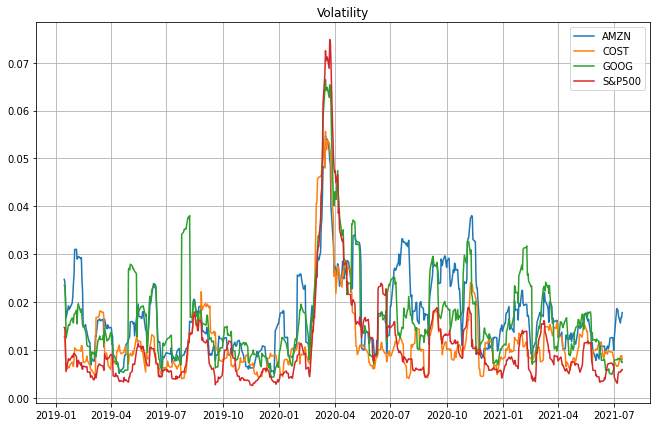

In [71]:
fig = plt.figure(figsize=(11,7))
plt.plot(volatility)
plt.legend(['AMZN', 'COST', 'GOOG', 'S&P500'])
plt.grid()
plt.title('Volatility')
plt.show()

__Annualised volatility__

In [72]:
# Annualised volatility for daily data
ann_vola = volatility*np.sqrt(252)

In [73]:
# Annualised volatility for hourly data
trading_hrs = 8
ann_vola = volatility*np.sqrt(252*trading_hrs)

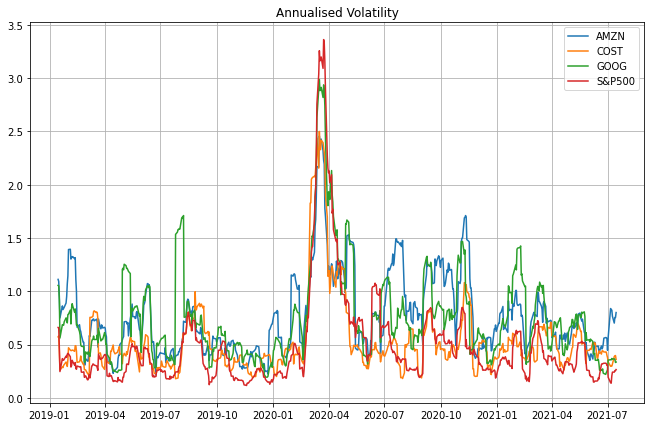

In [74]:
fig = plt.figure(figsize=(11,7))
plt.plot(ann_vola)
plt.legend(['AMZN', 'COST', 'GOOG', 'S&P500'])
plt.grid()
plt.title('Annualised Volatility')
plt.show()

## 4.5 Correlations in the market

In [75]:
# Download data for AMZN, GOOG, COST and S&P500
mydata1 = yf.download(['GLD', 'XOM', 'LUV', 'DAL', '^GSPC', 'AMZN'],start = '2019-01-01')

[*********************100%***********************]  6 of 6 completed


In [76]:
mydata1.head()

Adj Close                                               \
                   AMZN        DAL         GLD        LUV        XOM   
Date                                                                   
2018-12-31  1501.969971  48.247189  121.250000  45.678123  58.403641   
2019-01-02  1539.130005  48.430889  121.330002  46.326736  59.688374   
2019-01-03  1500.280029  44.099281  122.430000  44.823132  58.771938   
2019-01-04  1575.390015  46.207077  121.440002  47.034313  60.938843   
2019-01-07  1629.510010  46.265083  121.860001  47.044140  61.255730   

                               Close                                    ...  \
                  ^GSPC         AMZN        DAL         GLD        LUV  ...   
Date                                                                    ...   
2018-12-31  2506.850098  1501.969971  49.900002  121.250000  46.480000  ...   
2019-01-02  2510.030029  1539.130005  50.090000  121.330002  47.139999  ...   
2019-01-03  2447.889893  1500.280029  45.610001  122.430000  45.610001  ...   
2019-01-04  2531.939941  1575.390015  47.790001  121.440002  47.860001  ...   
2019-01-07  2549.689941  1629.510010  47.849998  121.860001  47.869999  ...   

                  Open                                      Volume            \
                   GLD        LUV        XOM        ^GSPC     AMZN       DAL   
Date                                                                           
2018-12-31  120.980003  46.939999  68.320000  2498.939941  6954500   6231700   
2019-01-02  121.349998  46.049999  67.349998  2476.959961  7983100   5270700   
2019-01-03  121.779999  46.480000  70.000000  2491.919922  6975600  18694100   
2019-01-04  121.320000  45.990002  69.639999  2474.330078  9182600  11037000   
2019-01-07  122.160004  47.840000  71.250000  2535.610107  7993200   9375500   

                                                     
                 GLD      LUV       XOM       ^GSPC  
Date                                                 
2018-12-31   8449400  3805100  15807000  3442870000  
2019-01-02  12776200  4081300  16727200  3733160000  
2019-01-03  15440800  4404900  13866100  3822860000  
2019-01-04  13334000  4762100  16043600  4213410000  
2019-01-07   7473600  5194700  10844200  4104710000  

[5 rows x 36 columns]

In [77]:
ret = mydata1['Adj Close'].pct_change().dropna()

In [78]:
ret.head()

,AMZN,DAL,GLD,LUV,XOM,^GSPC
Date,,,,,,
2019-01-02,0.024741,0.003807,0.000660,0.014200,0.021997,0.001268
2019-01-03,-0.025242,-0.089439,0.009066,-0.032457,-0.015354,-0.024757
2019-01-04,0.050064,0.047797,-0.008086,0.049331,0.036870,0.034336
2019-01-07,0.034353,0.001255,0.003458,0.000209,0.005200,0.007010
2019-01-08,0.016612,-0.007941,-0.002708,-0.006894,0.007271,0.009695


In [79]:
corr = ret.corr()

In [80]:
corr

,AMZN,DAL,GLD,LUV,XOM,^GSPC
AMZN,1.000000,0.126751,0.120042,0.186389,0.199601,0.608422
DAL,0.126751,1.000000,0.018942,0.823080,0.581275,0.558098
GLD,0.120042,0.018942,1.000000,0.021424,-0.031593,0.102970
LUV,0.186389,0.823080,0.021424,1.000000,0.545826,0.582296
XOM,0.199601,0.581275,-0.031593,0.545826,1.000000,0.662540
^GSPC,0.608422,0.558098,0.102970,0.582296,0.662540,1.000000


In [81]:
import seaborn as sns

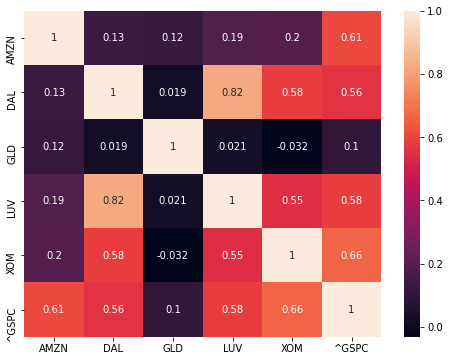

In [82]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns);

__Note: Correlation changes over time!__

In [83]:
# Applying a 1-year rolling window to calculate correlation  
# between GLD and XOM
rolling_cor = ret['GLD'].rolling(window=252).corr(ret['XOM'])
rolling_cor.tail()

Date
2021-07-09   -0.011527
2021-07-12   -0.010239
2021-07-13   -0.010341
2021-07-14   -0.016897
2021-07-15   -0.017061
dtype: float64

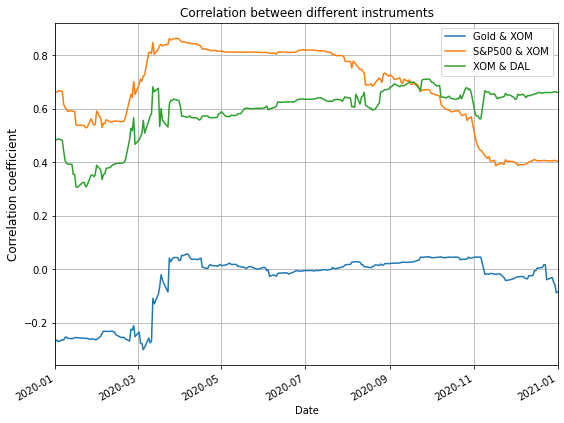

In [88]:
fig = plt.figure(figsize=(9,7))
ret['GLD'].rolling(window=200).corr(ret['XOM']).plot()
ret['^GSPC'].rolling(window=100).corr(ret['XOM']).plot()
ret['XOM'].rolling(window=100).corr(ret['DAL']).plot()
plt.title('Correlation between different instruments')
plt.xlim(['2020', '2021'])
plt.ylabel('Correlation coefficient', fontsize=12)
plt.legend(['Gold & XOM', 'S&P500 & XOM', 'XOM & DAL'])
plt.grid()
plt.show()

## 4.6 Linear regression analysis

In [89]:
#!pip install scikit-learn scipy matplotlib

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
ret['XOM'].values

array([ 0.02199748, -0.01535366,  0.03686971,  0.00520008,  0.00727072,
        0.00527488, -0.00510889, -0.00458019, -0.00125488,  0.00055831,
       -0.00041861,  0.00683958,  0.01192323, -0.01507066, -0.00820716,
        0.00140264,  0.00448197, -0.00669284,  0.00379007,  0.01090749,
        0.01369472,  0.0360263 , -0.01448892,  0.01029124, -0.00436552,
       -0.0077068 ,  0.00162495,  0.00162207,  0.01754378,  0.01127318,
        0.00026228,  0.01888045,  0.00669145,  0.00383493, -0.0090411 ,
        0.00770994,  0.00102008,  0.00203842,  0.01029748, -0.00553676,
        0.0122738 ,  0.00387497, -0.00149411, -0.01134819,  0.01110007,
       -0.01434636,  0.00974552,  0.00275762,  0.00887497, -0.00334509,
       -0.00360537,  0.01160326, -0.00259008,  0.00556456,  0.00577969,
       -0.01601655, -0.00695834,  0.01301305, -0.00765836,  0.00497885,
        0.0007433 ,  0.01150991, -0.00428255, -0.00589809,  0.01421524,
        0.00536234,  0.00618259, -0.01289158, -0.00451608,  0.00

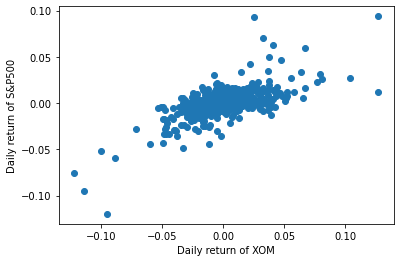

In [92]:
plt.scatter(ret['XOM'], ret['^GSPC'])
plt.xlabel('Daily return of XOM')
plt.ylabel('Daily return of S&P500')
plt.show()

In [93]:
x = np.array([ret['XOM']]).T
y = np.array(ret['^GSPC'])

In [94]:
# Instantiate the LinearRegression model:
lm = LinearRegression()

In [95]:
lm.fit(x, y)

LinearRegression()

In [96]:
# Extract the intercept:
lm.intercept_

0.0008546540494815992

In [97]:
# The slope:
lm.coef_

array([0.41381447])

In [98]:
def plot_LR(x, y, a, beta):
    '''function that plots the regression with original points'''
    xx = np.linspace(min(x), max(x),200) 
    yy = a + beta * xx
    
    plt.plot(x, y,'o', ms=2)
    plt.plot(xx,yy)  # the regression line
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title('y = %f + %f*x'%(a, beta))

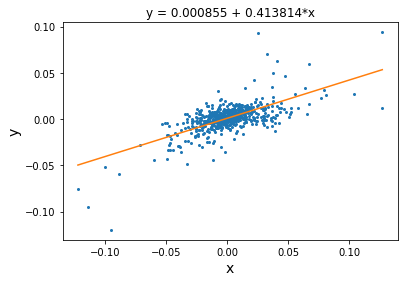

In [99]:
plot_LR(x, y, lm.intercept_, lm.coef_)